<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#87CEEB"> <b>Introduction to Cognitive Science</b><br><br>HomeWork #3</i></font></h1>
            </td>
            <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
            </td>
        </tr>
        </table>
    
</div>
<br>
<font size=3 color="#00FFFF"> Sina Pirmoradian : 810101125 <br></font><br>

<font color="#FA5F55"><h1>HW #3 Question #2</h2></font>

---



<font color="#F4BB44"><h3>Connect Google Drive</h3></font>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


<font color="#F4BB44"><h3>Import require library</h3></font>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<font color="#F4BB44"><h3>Read the CSV file and reshape the face data</h3></font>

In [15]:
# Read the CSV file into a Pandas DataFrame
face = pd.read_csv('/content/drive/MyDrive/HW_3_CS_Part_2/face.csv')

# Remove the first column
face = face.drop(columns=face.columns[0], axis=1)


# Store the channel names
channel_names = face.columns[1:]

# Transpose the DataFrame
face = face.T

# Get the shape of the transposed DataFrame
face_shape = face.shape

# Initialize an empty array to store the concatenated slices
concatenated = np.empty((126, 166, 0))

# Iterate over the columns in the DataFrame
for i in range(0, face_shape[1], 166):
    # Get the slice from column i to i+166
    slice_ = face.iloc[:, i:i+166].values

    # Expand the dimensions of the slice to (126, 166, 1)
    slice_ = np.expand_dims(slice_, axis=2)

    # Concatenate the slice to the existing array
    concatenated = np.concatenate((concatenated, slice_), axis=2)

<font color="#F4BB44"><h3>Read the CSV file and reshape the non-face data</h3></font>

In [16]:
# Read the CSV file into a Pandas DataFrame
non_face = pd.read_csv('/content/drive/MyDrive/HW_3_CS_Part_2/non-face.csv')

# Remove the first column
non_face = non_face.drop(columns=non_face.columns[0], axis=1)


# Store the channel names
channel_names = non_face.columns[1:]

# Transpose the DataFrame
non_face = non_face.T

# Get the shape of the transposed DataFrame
non_face_shape = non_face.shape

# Initialize an empty array to store the concatenated slices
non_concatenated = np.empty((126, 830, 0))

# Iterate over the columns in the DataFrame
for i in range(0, non_face_shape[1], 830):
    # Get the slice from column i to i+830
    slice_ = non_face.iloc[:, i:i+830].values

    # Expand the dimensions of the slice to (126, 166, 1)
    slice_ = np.expand_dims(slice_, axis=2)

    # Concatenate the slice to the existing array
    non_concatenated = np.concatenate((non_concatenated, slice_), axis=2)

<font color="#FA5F55"><h1>PART #1</h2></font>

---



<font color="#F4BB44"><h3>Draw and Compute the mean ERPs across trials for each time point for face data</h3></font>

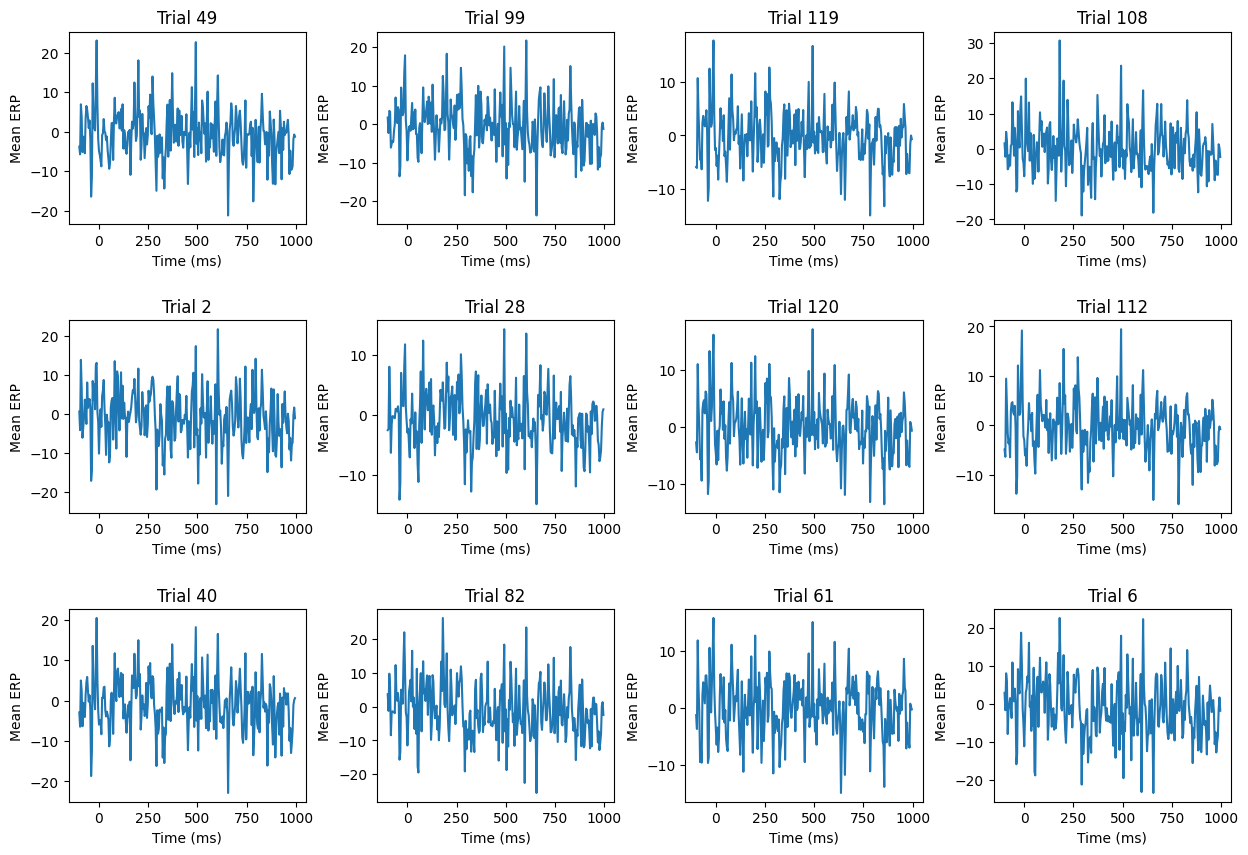

In [59]:
import random

# Compute the mean ERPs across trials for each time point
mean_erps = concatenated.mean(axis=1)

# Compute the confidence intervals using the standard error of the mean
# std_error = concatenated.std(axis=1) / np.sqrt(concatenated.shape[1])
# conf_interval = 1.96 * std_error  # 95% confidence interval

# Plot the mean ERPs with error bars
time_points = np.arange(-100, 997, 4)

# Fix the seed to a specific value, such as 25
random.seed(25)

# Select 12 random trial
random_trials = random.sample(range(mean_erps.shape[0]), 12)

# Create 3x4 subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, Trial in enumerate(random_trials):
    row = i // 4
    col = i % 4

    # Plot the mean ERP for the selected channel
    axs[row, col].plot(time_points, mean_erps[Trial])
    # axs[row, col].fill_between(time_points, mean_erps[channel] - conf_interval[channel], 
    #                             mean_erps[channel] + conf_interval[channel],
    #                             alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC')

    axs[row, col].set_title(f'Trial {Trial + 1}')
    axs[row, col].set_xlabel('Time (ms)')
    axs[row, col].set_ylabel('Mean ERP')

plt.show()

<font color="#F4BB44"><h3>Draw and Compute the mean ERPs across trials for each time point for non-face data</h3></font>

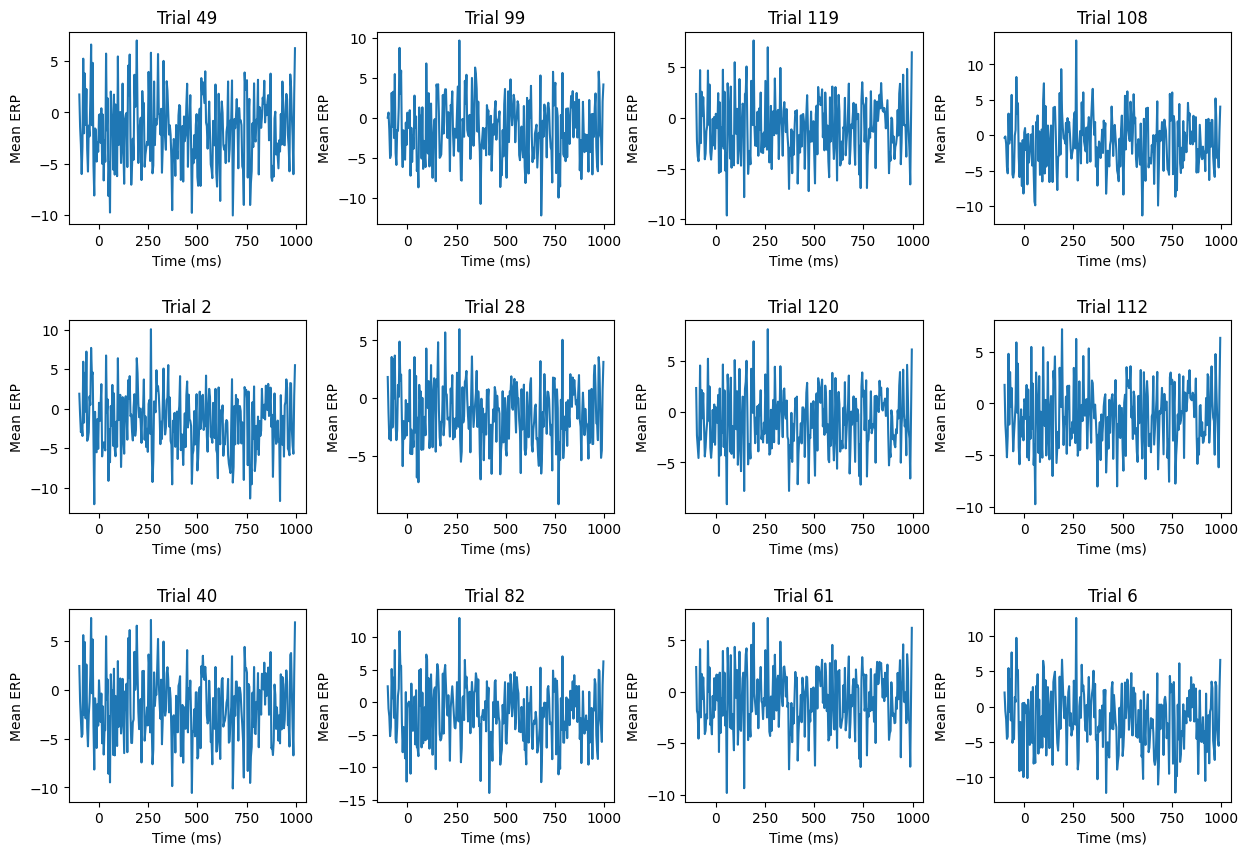

In [56]:
import random

# Compute the mean ERPs across trials for each time point
non_mean_erps = non_concatenated.mean(axis=1)

# Compute the confidence intervals using the standard error of the mean
# std_error = concatenated.std(axis=1) / np.sqrt(concatenated.shape[1])
# conf_interval = 1.96 * std_error  # 95% confidence interval

# Plot the mean ERPs with error bars
time_points = np.arange(-100, 997, 4)

# Fix the seed to a specific value, such as 25
random.seed(25)

# Select 12 random trial
random_trials = random.sample(range(non_mean_erps.shape[0]), 12)

# Create 3x4 subplots
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, Trial in enumerate(random_trials):
    row = i // 4
    col = i % 4

    # Plot the mean ERP for the selected channel
    axs[row, col].plot(time_points, non_mean_erps[Trial])
    # axs[row, col].fill_between(time_points, mean_erps[channel] - conf_interval[channel], 
    #                             mean_erps[channel] + conf_interval[channel],
    #                             alpha=0.2, edgecolor='#1B2ACC', facecolor='#1B2ACC')

    axs[row, col].set_title(f'Trial {Trial + 1}')
    axs[row, col].set_xlabel('Time (ms)')
    axs[row, col].set_ylabel('Mean ERP')

plt.show()

<font color="#FA5F55"><h1>PART #2</h2></font>

---



<font color="#F4BB44"><h3>ERP of face condition of all channels confidence_interval-%95</h3></font>

126


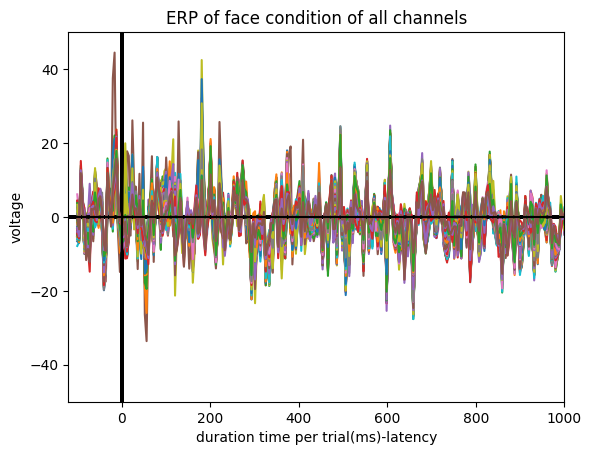

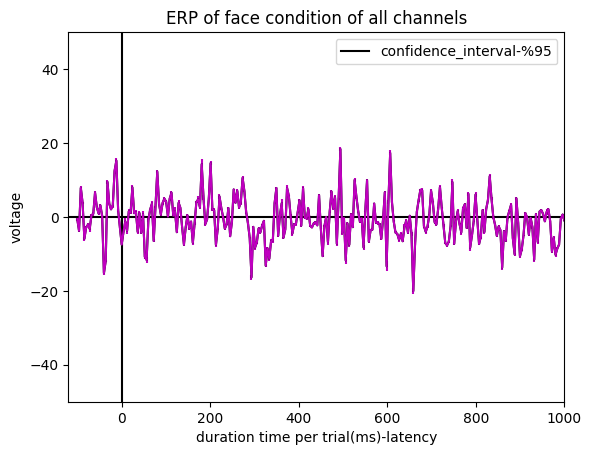

In [43]:
import numpy as np
import matplotlib.pyplot as plt

face_erp = concatenated 
epc_f = []
erp_f = []
err_f = []
t = np.linspace(-100, 1000, 275)
plt.figure()

for j in range(0, 126):
    erp_f.append(np.mean(face_erp[j, :, :], axis=0))
    plt.plot(t, erp_f[j-1])

    plt.ylim([-50, 50])
    plt.xlim([-120, 1000])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
print(len(erp_f))
plt.xlabel('duration time per trial(ms)-latency')
plt.ylabel('voltage')
plt.title('ERP of face condition of all channels')

plt.figure()
t = np.linspace(-100, 1000, 275)
m_f_er = np.mean(erp_f, axis=0)
sem_f_amp = 1.96 * np.std(erp_f, axis=0) / np.sqrt(126)
plt.errorbar(t, m_f_er, sem_f_amp, color='m')
plt.plot(t, m_f_er, 'k', linewidth=1.5)
plt.ylim([-50, 50])
plt.xlim([-120, 1000])
plt.xlabel('duration time per trial(ms)-latency')
plt.ylabel('voltage')
plt.title('ERP of face condition of all channels')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.legend(['confidence_interval-%95'])

plt.show()


<font color="#F4BB44"><h3>ERP of non-face condition of all channels confidence_interval-%95</h3></font>

126


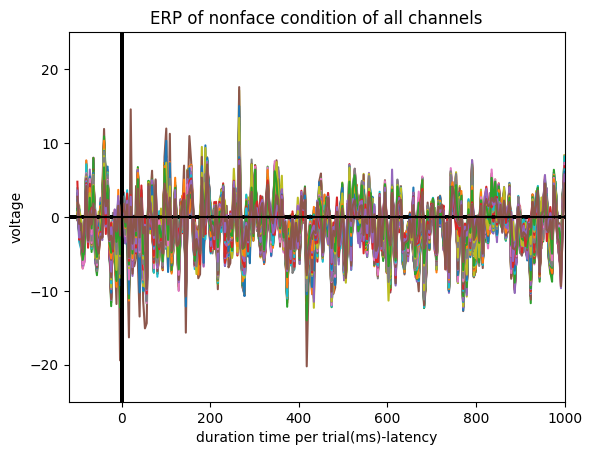

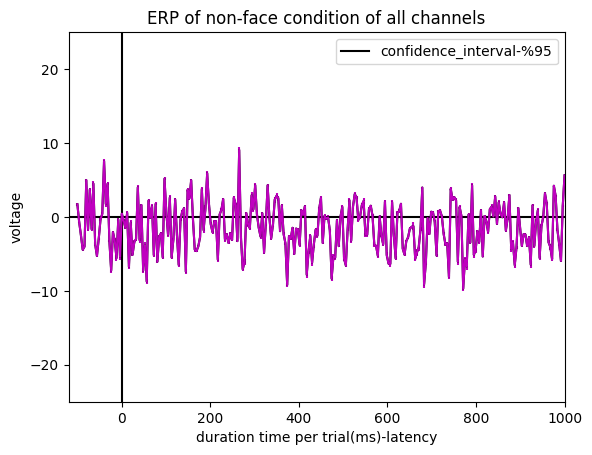

In [42]:
import numpy as np
import matplotlib.pyplot as plt

n_face_erp = non_concatenated 
epc_nf = []
erp_nf = []
err_nf = []
t = np.linspace(-100, 1000, 275)
plt.figure()

for j in range(0, 126):
    erp_nf.append(np.mean(n_face_erp[j, :, :], axis=0))
    plt.plot(t, erp_nf[j-1])

    plt.ylim([-25, 25])
    plt.xlim([-120, 1000])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
print(len(erp_nf))
plt.xlabel('duration time per trial(ms)-latency')
plt.ylabel('voltage')
plt.title('ERP of nonface condition of all channels')

plt.figure()
t = np.linspace(-100, 1000, 275)
m_nf_er = np.mean(erp_nf, axis=0)
sem_nf_amp = 1.96 * np.std(erp_nf, axis=0) / np.sqrt(126)
plt.errorbar(t, m_nf_er, sem_nf_amp, color='m')
plt.plot(t, m_nf_er, 'k', linewidth=1.5)
plt.ylim([-25, 25])
plt.xlim([-120, 1000])
plt.xlabel('duration time per trial(ms)-latency')
plt.ylabel('voltage')
plt.title('ERP of non-face condition of all channels')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.legend(['confidence_interval-%95'])

plt.show()


<font color="#FA5F55"><h1>PART #3</h2></font>

---



<font color="#F4BB44"><h3>Find the time and amplitude of the N170 component for face non-face data</h3></font>


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Assuming face_data and non_face_data are the input arrays
face_data = concatenated
non_face_data = non_concatenated

# Compute the mean ERPs across trials for each time point (Face Stimuli)
face_mean_erps = face_data.mean(axis=1)
face_std_error = face_data.std(axis=1) / np.sqrt(face_data.shape[1])
face_conf_interval = 1.96 * face_std_error

# Compute the mean ERPs across trials for each time point (Non-Face Stimuli)
non_face_mean_erps = non_face_data.mean(axis=1)
non_face_std_error = non_face_data.std(axis=1) / np.sqrt(non_face_data.shape[1])
non_face_conf_interval = 1.96 * non_face_std_error

# Find the time and amplitude of the N170 component for face data
face_n170_time = np.argmin(np.abs(face_mean_erps - (170)), axis=1)
face_n170_amplitude = face_mean_erps[np.arange(face_mean_erps.shape[0]), face_n170_time]

# Find the time and amplitude of the N170 component for non-face data
non_face_n170_time = np.argmin(np.abs(non_face_mean_erps - (170)), axis=1)
non_face_n170_amplitude = non_face_mean_erps[np.arange(non_face_mean_erps.shape[0]), non_face_n170_time]

<font color="#F4BB44"><h3>Plot the Timing refered to amplitude of the N170 component for face and non-face data</h3></font>

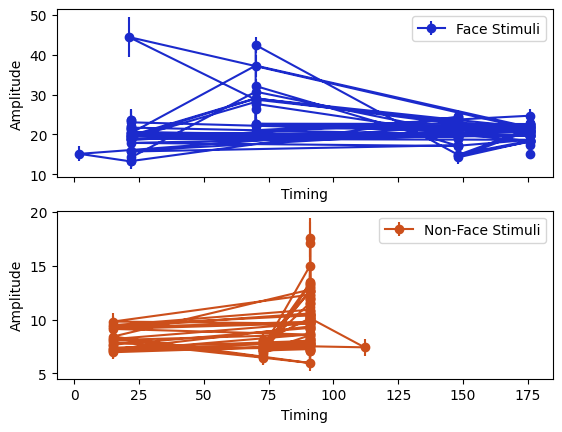

In [62]:
# Plot the Timing refered to amplitude of the N170 component for face and non-face data
fig, axs = plt.subplots(nrows=2, sharex=True)

axs[0].errorbar(face_n170_time, face_n170_amplitude, yerr=face_conf_interval[np.arange(face_mean_erps.shape[0]), face_n170_time],
                marker='o', color='#1B2ACC', label='Face Stimuli')
axs[0].set_xlabel('Timing')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].errorbar(non_face_n170_time, non_face_n170_amplitude, yerr=non_face_conf_interval[np.arange(non_face_mean_erps.shape[0]), non_face_n170_time],
                marker='o', color='#CC4F1B', label='Non-Face Stimuli')
axs[1].set_xlabel('Timing')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.show()

<font color="#F4BB44"><h3># Plot the timing of the N170 component for face and non-face data</h3></font>

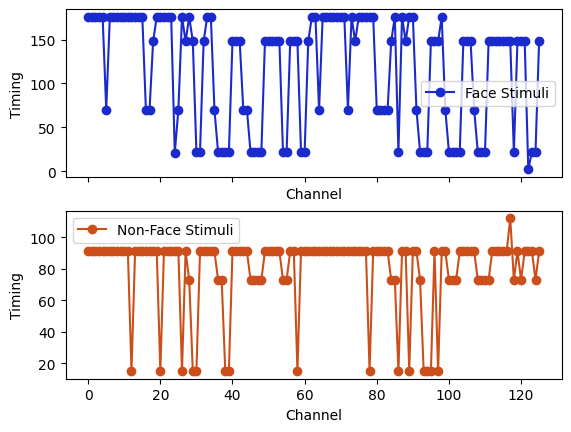

In [63]:
# Plot the timing of the N170 component for face and non-face data
fig, axs = plt.subplots(nrows=2, sharex=True)

axs[0].plot(face_n170_time, marker='o', color='#1B2ACC', label='Face Stimuli')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Timing')
axs[0].legend()

axs[1].plot(non_face_n170_time, marker='o', color='#CC4F1B', label='Non-Face Stimuli')
axs[1].set_xlabel('Channel')
axs[1].set_ylabel('Timing')
axs[1].legend()

plt.show()

<font color="#F4BB44"><h3>Plot the amplitude of the N170 component for face and non-face data</h3></font>

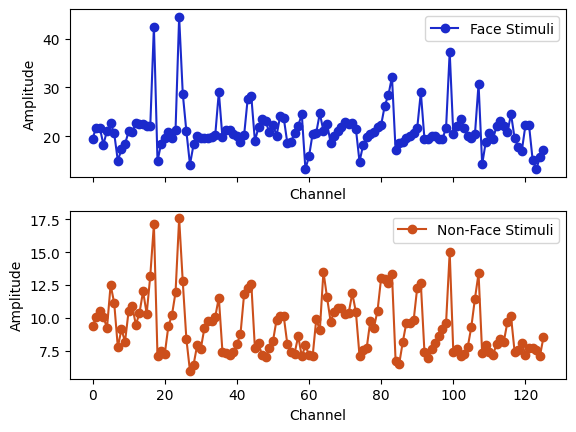

In [64]:
# Plot the amplitude of the N170 component for face and non-face data
fig, axs = plt.subplots(nrows=2, sharex=True)

axs[0].plot(face_n170_amplitude, marker='o', color='#1B2ACC', label='Face Stimuli')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].plot(non_face_n170_amplitude, marker='o', color='#CC4F1B', label='Non-Face Stimuli')
axs[1].set_xlabel('Channel')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.show()

<font color="#F4BB44"><h3>Perform a Wilcoxon test to determine if there is a statistically significant difference between the two sets of results</h3></font>

In [65]:
# Perform a Wilcoxon test to determine if there is a statistically significant difference between the two sets of results
p_value_amplitude = wilcoxon(face_n170_amplitude, non_face_n170_amplitude).pvalue
p_value_timing = wilcoxon(face_n170_time, non_face_n170_time).pvalue
print("p_value_amplitude:", p_value_amplitude)
print("p_value_timing:", p_value_timing)

p_value_amplitude: 2.029467500049271e-22
p_value_timing: 5.390586478773336e-11


<font color="#F4BB44"><h3>Summery of the code</h3></font>

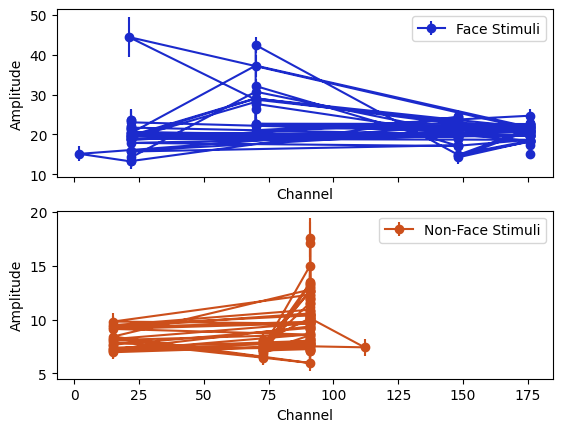

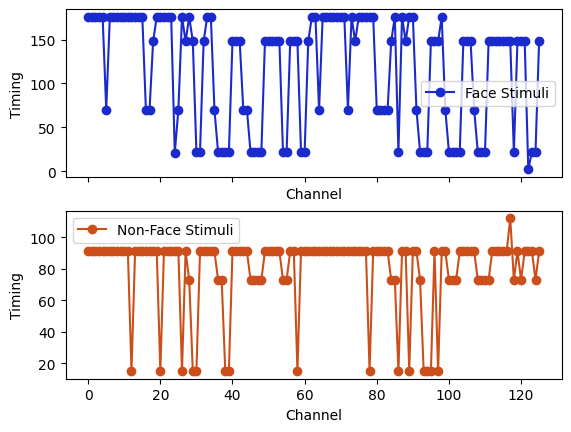

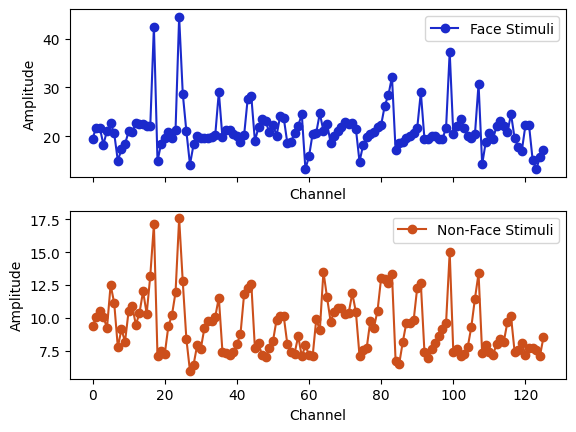

p_value_amplitude: 2.029467500049271e-22
p_value_timing: 5.390586478773336e-11


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Assuming face_data and non_face_data are the input arrays
face_data = concatenated
non_face_data = non_concatenated

# Compute the mean ERPs across trials for each time point (Face Stimuli)
face_mean_erps = face_data.mean(axis=1)
face_std_error = face_data.std(axis=1) / np.sqrt(face_data.shape[1])
face_conf_interval = 1.96 * face_std_error

# Compute the mean ERPs across trials for each time point (Non-Face Stimuli)
non_face_mean_erps = non_face_data.mean(axis=1)
non_face_std_error = non_face_data.std(axis=1) / np.sqrt(non_face_data.shape[1])
non_face_conf_interval = 1.96 * non_face_std_error

# Find the time of the N170 component for face data
face_n170_time = np.argmin(np.abs(face_mean_erps - 170), axis=1)

# Find the time of the N170 component for non-face data
non_face_n170_time = np.argmin(np.abs(non_face_mean_erps - 170), axis=1)

# Find the amplitude of the N170 component for face and non-face data
face_n170_amplitude = face_mean_erps[np.arange(face_mean_erps.shape[0]), face_n170_time]
non_face_n170_amplitude = non_face_mean_erps[np.arange(non_face_mean_erps.shape[0]), non_face_n170_time]

# Plot the amplitude and timing of the N170 component for face and non-face data
fig, axs = plt.subplots(nrows=2, sharex=True)

axs[0].errorbar(face_n170_time, face_n170_amplitude, yerr=face_conf_interval[np.arange(face_mean_erps.shape[0]), face_n170_time],
                marker='o', color='#1B2ACC', label='Face Stimuli')
axs[0].set_xlabel('Timing')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].errorbar(non_face_n170_time, non_face_n170_amplitude, yerr=non_face_conf_interval[np.arange(non_face_mean_erps.shape[0]), non_face_n170_time],
                marker='o', color='#CC4F1B', label='Non-Face Stimuli')
axs[1].set_xlabel('Timing')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.show()

# Plot the timing of the N170 component for face and non-face data
fig, axs = plt.subplots(nrows=2, sharex=True)

axs[0].plot(face_n170_time, marker='o', color='#1B2ACC', label='Face Stimuli')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Timing')
axs[0].legend()

axs[1].plot(non_face_n170_time, marker='o', color='#CC4F1B', label='Non-Face Stimuli')
axs[1].set_xlabel('Channel')
axs[1].set_ylabel('Timing')
axs[1].legend()

plt.show()

# Plot the amplitude of the N170 component for face and non-face data
fig, axs = plt.subplots(nrows=2, sharex=True)

axs[0].plot(face_n170_amplitude, marker='o', color='#1B2ACC', label='Face Stimuli')
axs[0].set_xlabel('Channel')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].plot(non_face_n170_amplitude, marker='o', color='#CC4F1B', label='Non-Face Stimuli')
axs[1].set_xlabel('Channel')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.show()

# Perform a Wilcoxon test to determine if there is a statistically significant difference between the two sets of results
p_value_amplitude = wilcoxon(face_n170_amplitude, non_face_n170_amplitude).pvalue
p_value_timing = wilcoxon(face_n170_time, non_face_n170_time).pvalue

print("p_value_amplitude:", p_value_amplitude)
print("p_value_timing:", p_value_timing)
